In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [8]:
# make dt_clf
dt_clf = DecisionTreeClassifier(random_state=156)

# data_load and train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                   iris.target,
                                                   test_size=0.2,
                                                   random_state=11)

# dt_clf.fit
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [9]:
from sklearn.tree import export_graphviz

# make tree.dot file by export_graphviz() API
export_graphviz(dt_clf, out_file='tree_test.dot', class_names=iris.target_names,
               feature_names=iris.feature_names, impurity=True, filled=True)

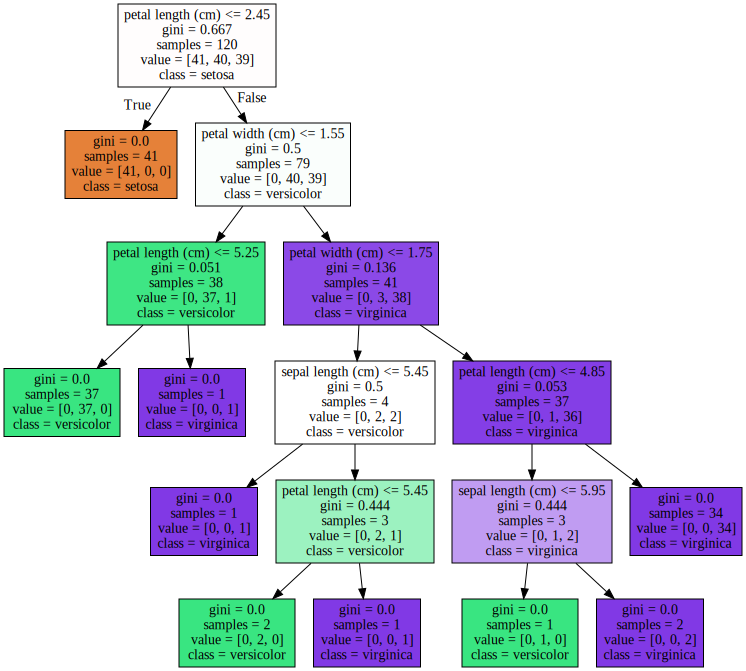

In [10]:
import graphviz
# tree_test.dot를 read
with open('tree_test.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
# check th ftrs importance
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print(name)
    print(value)

sepal length (cm)
0.02500520941862888
sepal width (cm)
0.0
petal length (cm)
0.5549028149313102
petal width (cm)
0.42009197565006084


의사결정나무에서의 주요 변수:
[0.025  0.     0.5549 0.4201]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420
0.9999999999999999


<AxesSubplot:>

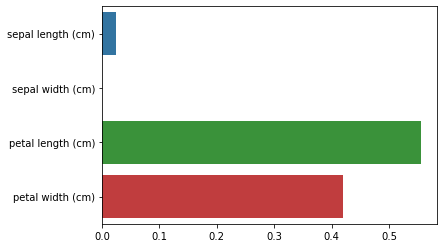

In [20]:
# feature extraction :: 변수 추출
print('의사결정나무에서의 주요 변수:\n{0}'.format(np.round(dt_clf.feature_importances_,4)))
results = 0

# mapping the features
for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))
    results = results + value
    
print(results) # 총합은 1이 됩니다

### 주요 인자의 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)

In [22]:
# 네이버 영화 데이터 평점 불러오기
import requests
from bs4 import BeautifulSoup as bs

url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20210503'

In [28]:
# step1. 위의 네이버 영화평점순위 데이터를 requests를 이용해 가져온 후
# parsing하여 soup이라는 변수에 저장한다.

data = requests.get(url) # Response 200

# parsing
soup = bs(data.text)
soup.head()[:5]

# # 노드의 구조를 지켜서 출력하고 싶다면
# print(soup.prettify()[:100]) # 출력 형태는 string

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Cont


In [30]:
# step2. 만약에 meta 정보에 관련된 모든 파싱된 값들을 'meta' 변수에 저장하고 싶다면? 

meta = soup.find_all('meta')

[<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>,
 <meta content="네이버영화 " property="me2:post_tag"/>,
 <meta content="네이버영화" property="me2:category1"/>,
 <meta content="" property="me2:category2"/>,
 <meta content="랭킹 : 네이버 영화" property="og:title"/>,
 <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>,
 <meta content="article" property="og:type"/>,
 <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20210503" property="og:url"/>,
 <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>,
 <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>,
 <meta content="네이버 영화" property="og:article:author"/>,
 <meta content="https://movie.naver.com/" property="og:article:author:

In [34]:
# step3. 만약 우리가 랭킹 테이블의 모든 파싱 데이터를 가져와 list_rank을 변수로 하여 저장하자

list_rank = soup.find(class_='list_ranking')
list_rank.find(class_='blind')

<caption class="blind">랭킹 테이블</caption>

In [53]:
# step4. list_rank에서 영화의 순위 및 이름, 평점, 영화정보 링크를 가져와서 df를 생성
# 변수명은 movie_table_df로 지정

import pandas as pd

title = [x.text.strip() for x in list_rank.find_all('div', class_='tit5')]
title

# title=[]
# for x in list_rank.find_all('div', class_='tit5'):
#     appended = x.text.strip()
#     title.append(appended)
    
# title

point = [x.text for x in list_rank.find_all('td', class_='point')]
point

# point = []
# for x in list_rank.find_all('td', class_='point'):
#     total = x.text
#     point.append(total)
# point

ranking = range(1,len(point)+1)

In [54]:
# 위의 데이터를 통해 df을 생성해보자.

movie_table_df = pd.DataFrame({'Rank':ranking,
                              'Title':title,
                              'Score':point})

In [56]:
movie_table_df.head()

,Rank,Title,Score
0,1,레옹,9.37
1,2,다시 태어나도 우리,9.35
2,3,피아니스트,9.33
3,4,"미안해요, 리키",9.32
4,5,부활: 그 증거,9.31


In [57]:
# step5. 위의 df에 'date' 컬럼 2021-05-03 값을 추가하여 생성

movie_table_df['Date'] = '2021-05-03'
movie_table_df.head()

,Rank,Title,Score,Date
0,1,레옹,9.37,2021-05-03
1,2,다시 태어나도 우리,9.35,2021-05-03
2,3,피아니스트,9.33,2021-05-03
3,4,"미안해요, 리키",9.32,2021-05-03
4,5,부활: 그 증거,9.31,2021-05-03


In [60]:
# step6. 위의 데이터를 pivot을 활용하여 Date를 컬럼으로
# Rank를 row로 재구성 해보자

mt_df_pivot = movie_table_df.pivot(columns='Date', index='Rank', values='Title')
mt_df_pivot

Date,2021-05-03
Rank,
1,레옹
2,다시 태어나도 우리
3,피아니스트
4,"미안해요, 리키"
5,부활: 그 증거
6,자산어보
7,소울
8,극장판 귀멸의 칼날: 무한열차편
9,플립
